In [69]:

#exploring dataset
import pickle
with open("train_label.pkl", 'rb') as f:
    labeltrain = pickle.load(f)
#making labels with 6 to 1 in labelset
labeltrain=[1 if x==6 else x for x in labeltrain]
set(labeltrain)#unique labels

{0, 1, 2, 3}

In [296]:
labeltraindict=dict(enumerate(labeltrain))
countMap = {}
for v in labeltraindict.values():
    countMap[v] = countMap.get(v,0) + 1
uni = [ k for k, v in labeltraindict.items() if countMap[v] == 1]    
print(countMap)#types of class count is showed

{0: 2000, 2: 2000, 3: 2000, 1: 2000}


Images of 4 classes

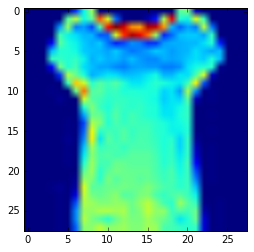

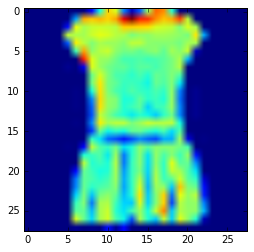

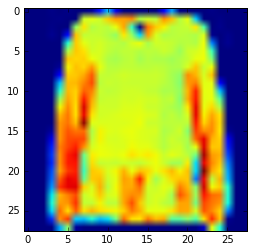

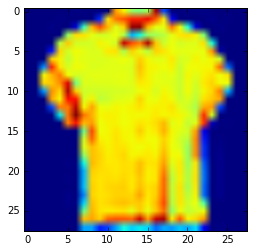

In [298]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np    #28*28 images of 4 classes
with open("train_image.pkl", 'rb') as f:
    data = pickle.load(f)
for j in [100,4000,6000,7500]:
    plt.imshow(np.array(data[j]).reshape((28, 28)))
    plt.show()


In [71]:
import tensorflow as tf
import pandas as pd

from sklearn.model_selection import train_test_split


In [241]:
# create training and testing vars
X_train, X_test, y_train, y_test = train_test_split(data, labeltrain, test_size=0.2,shuffle=True)
#testsize f 400 samples from training data kept aside

In [233]:
print (len(X_train), len(y_train))
print()
# print(X_test.size, y_test.size)

6400 6400



Normalizing helped in making values of matrix image b/w 0 and 1.

In [234]:
#noramilize the data
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)

In [235]:
X_train.shape #6400 images with 28*28=784 size

(6400, 784)

In [176]:
# type(X_train)
# X_train = tf.convert_to_tensor(X_train, np.float32)
# X_train.shape

Creating a sequential model to in tensorflow with 3dense layers activated with relu function and last one with softmax

In [21]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128,activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(4,activation=tf.nn.softmax))

In [22]:
#loss and optimiser for the model has been defined for compiling
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [30]:
model.fit(X_train,np.array(y_train),batch_size=None,steps_per_epoch=200)
#fitting the model for training,in each epoch all 6400 images are processed

Epoch 1/1
200/200 [==============================] - 12s 61ms/step - loss: 0.2573 - acc: 0.9002 0s - loss: 0.2590 


In [31]:
val_loss,val_acc=model.evaluate(X_test,y_test)

1600/1600 [==============================] - 0s 26us/step


In [32]:
print(val_loss,val_acc)


0.458314576447 0.83375


In [ ]:
#model.save("mark1.model")
#new_model=tf.keras.models.load_model('mark1.model')
#saving this model to load again later

In [33]:
print(np.argmax(model.predict([X_test])[0]))
#checking predictions

2


In [385]:
with open("test_image.pkl", 'rb') as f:
    testdata = pickle.load(f)


Finally,predicting the class for each image in testfile and reassigning the class 1 to 6 to revert the change of name done earlier

(1600, 28, 28, 1)

In [ ]:
final_predictions_mark1=[]
for i in range(len(testdata)):
    final_predictions_mark1.append(np.argmax(model.predict([testdata])[i]))
    if i%100==0:
        print(i)
final_predictions_mark1=[6 if x==1 else x for x in final_predictions_mark1]


exporting the predictions in csv file for test images with index starting from 0

In [193]:
# import pandas as pd
# res = final_predictions_mark1
# my_df = pd.DataFrame(res)
# my_df.to_csv('mark1predict.csv', index=True, header=False)
# my_df

defining another model by adding layers and tuning parameters

In [331]:
X_train, X_test, y_train, y_test = train_test_split(data, labeltrain, test_size=0.2,shuffle=True)
X_train=tf.keras.utils.normalize(X_train)
X_test=tf.keras.utils.normalize(X_test)

In [332]:
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [333]:
from tensorflow.python import keras


In [340]:
def data_preprocessing(raw,y_):
    out_y = keras.utils.to_categorical(y_, 4)
    num_images = raw.shape[0]
    #x_as_array = raw.values[:,1:]
    x_shaped_array = raw.reshape(num_images, 28, 28, 1)
    
    return x_shaped_array, out_y


In [368]:
X, y = data_preprocessing(X_train,y_train)
X_t,y_t=data_preprocessing(X_test,y_test)

In [383]:
x_test.shape

(10000, 28, 28)

In [344]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=100)

In [345]:
X_train.shape[0]+X_val.shape[0]

6400

In [373]:
model2=tf.keras.Sequential()
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1))) 
model2.add(tf.keras.layers.MaxPooling2D((2,2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model2.add(tf.keras.layers.MaxPooling2D((2, 2)))
model2.add(tf.keras.layers.Dropout(0.25))
model2.add(tf.keras.layers.Flatten())
model2.add(tf.keras.layers.Dense(1024, activation='relu'))
model2.add(tf.keras.layers.Dropout(0.3))
model2.add(tf.keras.layers.Dense(4, activation='softmax'))  

In [374]:
#model.compile() to configure the learning process before training the model.
model2.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [375]:
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_64 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_54 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_67 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_65 (Conv2D)           (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_55 (MaxPooling (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 7, 7, 64)          0         
_________________________________________________________________
flatten_27 (Flatten)         (None, 3136)              0         
__________

In [ ]:
NO_EPOCHS = 50
BATCH_SIZE = 128

In [376]:
model2.fit(X_train, y_train,batch_size=128,verbose=1,epochs=50,validation_data=(X_val, y_val))

Train on 5120 samples, validate on 1280 samples
Epoch 1/50
5120/5120 [==============================] - 13s 2ms/step - loss: 0.8650 - acc: 0.6480 - val_loss: 0.6915 - val_acc: 0.6820
Epoch 2/50
5120/5120 [==============================] - 12s 2ms/step - loss: 0.6481 - acc: 0.7193 - val_loss: 0.5966 - val_acc: 0.7500
Epoch 3/50
5120/5120 [==============================] - 13s 3ms/step - loss: 0.5732 - acc: 0.7600 - val_loss: 0.5565 - val_acc: 0.7828
Epoch 4/50
5120/5120 [==============================] - 12s 2ms/step - loss: 0.5150 - acc: 0.7916 - val_loss: 0.5121 - val_acc: 0.8039
Epoch 5/50
5120/5120 [==============================] - 13s 2ms/step - loss: 0.4805 - acc: 0.8145 - val_loss: 0.4856 - val_acc: 0.8195
Epoch 6/50
5120/5120 [==============================] - 13s 2ms/step - loss: 0.4556 - acc: 0.8195 - val_loss: 0.4610 - val_acc: 0.8227
Epoch 7/50
5120/5120 [==============================] - 12s 2ms/step - loss: 0.4259 - acc: 0.8342 - val_loss: 0.4542 - val_acc: 0.8227
Epoch 8

In [371]:
model3=tf.keras.Sequential()
model3.add(tf.keras.layers.Conv2D(filters=32, kernel_initializer='he_normal', kernel_size=(3, 3), padding='same', activation='relu', input_shape=(28,28,1))) 
model3.add(tf.keras.layers.MaxPooling2D((2,2)))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(3, 3), padding='same', activation='relu'))
model3.add(tf.keras.layers.MaxPooling2D((2, 2)))
model3.add(tf.keras.layers.Dropout(0.25))
model3.add(tf.keras.layers.Flatten())
model3.add(tf.keras.layers.Dense(128, activation='relu'))
model3.add(tf.keras.layers.Dropout(0.3))
model3.add(tf.keras.layers.Dense(4, activation='softmax')) 
model3.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])


In [372]:
model3.fit(X_train, y_train,batch_size=128,verbose=1,epochs=50,validation_data=(X_val, y_val))

Train on 5120 samples, validate on 1280 samples
Epoch 1/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.8946 - acc: 0.6254 - val_loss: 0.7140 - val_acc: 0.7094
Epoch 2/50
5120/5120 [==============================] - 5s 906us/step - loss: 0.6655 - acc: 0.7127 - val_loss: 0.6120 - val_acc: 0.7289
Epoch 3/50
5120/5120 [==============================] - 5s 935us/step - loss: 0.5880 - acc: 0.7580 - val_loss: 0.5642 - val_acc: 0.7703
Epoch 4/50
5120/5120 [==============================] - 5s 1ms/step - loss: 0.5452 - acc: 0.7812 - val_loss: 0.5246 - val_acc: 0.7937
Epoch 5/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.4988 - acc: 0.8027 - val_loss: 0.5048 - val_acc: 0.8031
Epoch 6/50
5120/5120 [==============================] - 6s 1ms/step - loss: 0.4718 - acc: 0.8131 - val_loss: 0.4690 - val_acc: 0.8211
Epoch 7/50
5120/5120 [==============================] - 5s 1ms/step - loss: 0.4545 - acc: 0.8232 - val_loss: 0.4550 - val_acc: 0.8266
Epoch 8/50

In [379]:
val_loss,val_acc=model2.evaluate(X_t,y_t, verbose=0)
print(val_loss,val_acc)


0.524764312804 0.85875


In [405]:
test_resh=np.array(testdata).reshape([2000,28,28,1])

In [406]:
final_predictions_mark1=[]
for i in range(len(testdata)):
    final_predictions_mark1.append(np.argmax(model2.predict([test_resh])[i]))
    if i%100==0:
        print(i)
final_predictions_mark1=[6 if x==1 else x for x in final_predictions_mark1]


0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900


In [415]:
import pandas as pd
res = final_predictions_mark1
my_df = pd.DataFrame(res)
my_df.to_csv('mark2predict.csv', index=True, header=False)
my_df.tail()

,0
1995,6
1996,6
1997,3
1998,6
1999,6


In [403]:
#model2.save("mark2.model")
#new_model2=tf.keras.models.load_model('mark2.model')